In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

from module import *

import quantstats as qs

In [3]:
price = load_price_data()
price

/Users/stuartlu/Documents/國泰人壽/ML 選股/module.py:28: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  price = pd.read_csv(path, encoding='cp950')


Open      High       Low     Close  Volume  \
證券代碼     年月日                                                          
1101 台泥  2015-01-05   20.3688   20.3688   20.0872   20.1810    2842   
         2015-01-06   19.9464   19.9933   19.7586   19.8290    7654   
         2015-01-07   19.8290   19.9698   19.6413   19.7586    8719   
         2015-01-08   19.8290   20.0168   19.7586   19.8290    8697   
         2015-01-09   19.8525   19.9933   19.6178   19.6178   10494   
...                       ...       ...       ...       ...     ...   
9958 世紀鋼 2024-07-11  284.5000  287.5000  277.0000  278.0000    5667   
         2024-07-12  278.5000  285.0000  274.0000  274.5000    5254   
         2024-07-15  275.5000  276.0000  259.0000  265.0000   12310   
         2024-07-16  266.0000  266.5000  258.0000  263.5000    6468   
         2024-07-17  266.5000  269.5000  255.0000  255.5000    7778   

                     QuoteVolume  MarketCap  YSTD Close  TMR Close  \
證券代碼     年月日                                                         
1101 台泥  2015-01-05       122244     158764         NaN    19.8290   
         2015-01-06       324150     155994     20.1810    19.7586   
         2015-01-07       368171     155441     19.8290    19.8290   
         2015-01-08       369425     155994     19.7586    19.6178   
         2015-01-09       441333     154333     19.8290    19.1250   
...                          ...        ...         ...        ...   
9958 世紀鋼 2024-07-11      1590302      71417    281.5000   274.5000   
         2024-07-12      1462079      70518    278.0000   265.0000   
         2024-07-15      3257792      68078    274.5000   263.5000   
         2024-07-16      1690688      67692    265.0000   255.5000   
         2024-07-17      2023095      65637    263.5000        NaN   

                     Daily Return  
證券代碼     年月日                       
1101 台泥  2015-01-05     -0.017596  
         2015-01-06     -0.003557  
         2015-01-07      0.003557  
         2015-01-08     -0.010708  
         2015-01-09     -0.025441  
...                           ...  
9958 世紀鋼 2024-07-11     -0.012670  
         2024-07-12     -0.035221  
         2024-07-15     -0.005676  
         2024-07-16     -0.030831  
         2024-07-17           NaN  

[2145921 rows x 10 columns]

In [15]:
q = 10

price.reset_index()
price['Quantile'] = price.groupby('年月日')['MarketCap'].transform(
        lambda x: pd.qcut(x.rank(method='first', ascending=False), q, labels=False, duplicates='drop'))

quantile_returns = price.groupby(['年月日', 'Quantile'])['Daily Return'].mean().unstack(level='Quantile')

In [18]:
portfolio = pd.DataFrame()

tw_0050 = yf.download('0050.TW', start = '2015-05-15', end = '2024-07-17')
twf = yf.download('00664R.TW', start = '2015-05-15', end = '2024-07-17')
portfolio['reverse'] = np.log(twf['Adj Close'] / twf['Adj Close'].shift(1)).shift(-1)
portfolio['0050'] = np.log(tw_0050['Adj Close'] / tw_0050['Adj Close'].shift(1)).shift(-1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

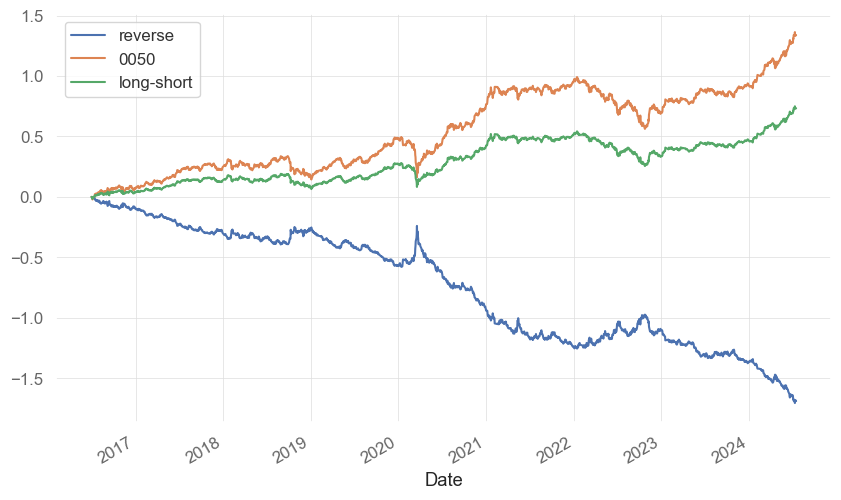

In [20]:
portfolio['long-short'] = (4*portfolio['0050'] + portfolio['reverse'])/5

portfolio.cumsum().plot()

In [22]:
qs.reports.metrics(portfolio)

/Users/stuartlu/anaconda3/envs/ml-taiwan-stockpicks/lib/python3.12/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = _utils._prepare_returns(returns, rf).resample(resolution).sum()


                    reverse     0050        long-short
------------------  ----------  ----------  ------------
Start Period        2016-07-01  2016-07-01  2016-07-01
End Period          2024-07-15  2024-07-15  2024-07-15
Risk-Free Rate      0.0%        0.0%        0.0%
Time in Market      93.0%       97.0%       100.0%

Cumulative Return   -83.33%     238.83%     98.83%
CAGR﹪              -14.25%     11.04%      6.08%

Sharpe              -1.33       0.99        0.87
Prob. Sharpe Ratio  0.01%       99.69%      99.21%
Sortino             -1.83       1.44        1.27
Sortino/√2          -1.3        1.02        0.9
Omega               0.78        0.78        0.78

Max Drawdown        -83.59%     -36.04%     -25.45%
Longest DD Days     2927        774         779

Gain/Pain Ratio     -0.22       0.19        0.17
Gain/Pain (1M)      -0.64       1.08        0.9

Payoff Ratio        1.05        1.14        1.12
Profit Factor       0.78        1.19        1.17
Common Sense Ratio  0.79        